# Title: Project Proposal

## Introduction:

### Background Information:
Cardiovascular diseases remain the leading cause of death globally. Cardiovascular diseases encompass many different heart conditions which are characterized by several different variables. Therefore, it becomes difficult to characterize an individual with specific conditions as having heart disease. Because of this, data sets and corresponding algorithms are essential tools for physicians, researchers, and other healthcare workers when characterizing or diagnosing a condition as heart disease.

### Research Question:
We attempt to answer the following question using a data set from Cleveland, Ohio regarding heart disease statistics: Considering a patient’s age, resting blood pressure, and serum cholesterol, will the heart disease diagnosis be classified as absent (FALSE) or present (TRUE)?

### Data set description:
The data set is from the 1980s and describes 14 different variables for patients who may have heart disease. We will utilize the patient's age, chest pain type, resting blood pressure, and serum cholesterol levels to ultimately create a classification that can aid us in answering the question posed above. We consider these variables as the most crucial and persuasive when wanting to determine the presence or absence of heart disease in a patient.

In [2]:
library(tidyverse)
library(repr)
library(scales)
library(tidymodels)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.3     

In [3]:
URL <- ("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

processed_cleveland <- read_csv(URL) 
    colnames(processed_cleveland) <- c("Age", "Sex","Chest_Pain_Type","Resting_Blood_Pressure","Serum_Cholestrol","Fasting_Blood_Sugar", "Resting_Electrocadriographic_Results", "Maximum_Heart_Rate_Achieved","Excercise_Induced_Angina", "ST_Depression_Induced","Slope_of_Peak_Exercise_ST_Segment", "#_of_Major_Vessels", "Defects", "Diagnosis_of_Heart_Disease")
processed_cleveland

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestrol,Fasting_Blood_Sugar,Resting_Electrocadriographic_Results,Maximum_Heart_Rate_Achieved,Excercise_Induced_Angina,ST_Depression_Induced,Slope_of_Peak_Exercise_ST_Segment,#_of_Major_Vessels,Defects,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [4]:
#select the variables that we need to make a model
cleveland_heart <- processed_cleveland |>
    select("Age","Resting_Blood_Pressure","Serum_Cholestrol","Diagnosis_of_Heart_Disease")
head(cleveland_heart)

Age,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis_of_Heart_Disease
<dbl>,<dbl>,<dbl>,<dbl>
67,160,286,2
67,120,229,1
37,130,250,0
41,130,204,0
56,120,236,0
62,140,268,3


In [5]:
# will construct a binary results(TRUE->presented or FALSE-> Absent) for Diagnosis_Hear_Disease instead of numbers
scaled_cleveland_heart <- cleveland_heart |>
    mutate(Diagnosis = Diagnosis_of_Heart_Disease != 0)

scaled_cleveland_heart

Age,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis_of_Heart_Disease,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
67,160,286,2,TRUE
67,120,229,1,TRUE
37,130,250,0,FALSE
41,130,204,0,FALSE
56,120,236,0,FALSE
62,140,268,3,TRUE
57,120,354,0,FALSE
63,130,254,2,TRUE
53,140,203,1,TRUE


In [6]:
#Select the variables that we need to build a model and change the diagnosis of Heart Disease to a factor data type instead of logic
cleveland_heart_cleaned <- scaled_cleveland_heart |>
    select(Age, Resting_Blood_Pressure, Serum_Cholestrol, Diagnosis)|>
    mutate("Diagnosis" = as_factor(Diagnosis))

head(cleveland_heart_cleaned)

Age,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis
<dbl>,<dbl>,<dbl>,<fct>
67,160,286,TRUE
67,120,229,TRUE
37,130,250,FALSE
41,130,204,FALSE
56,120,236,FALSE
62,140,268,TRUE


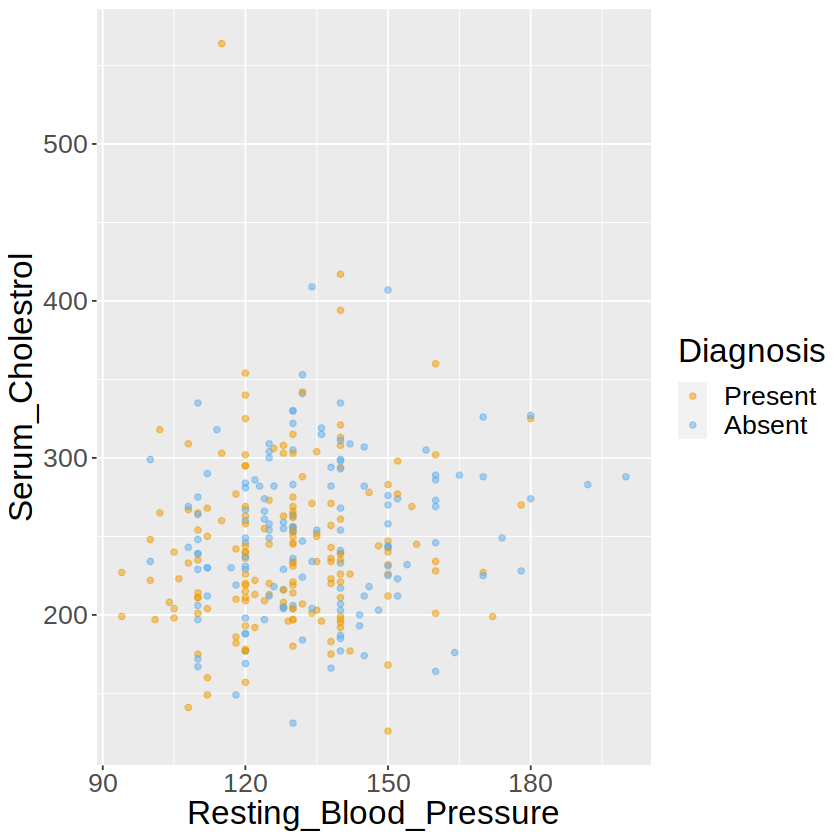

In [7]:
# Let's visualize if there is any relationship between the predictors and the results
# This one is Serum_Cholestrol, Resting_Blood_Pressure vs Diagnosis (Present = TRUE, Absent = FALSE)
perim_heart <- cleveland_heart_cleaned |>
  ggplot(aes(x = Resting_Blood_Pressure, y = Serum_Cholestrol, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

perim_heart

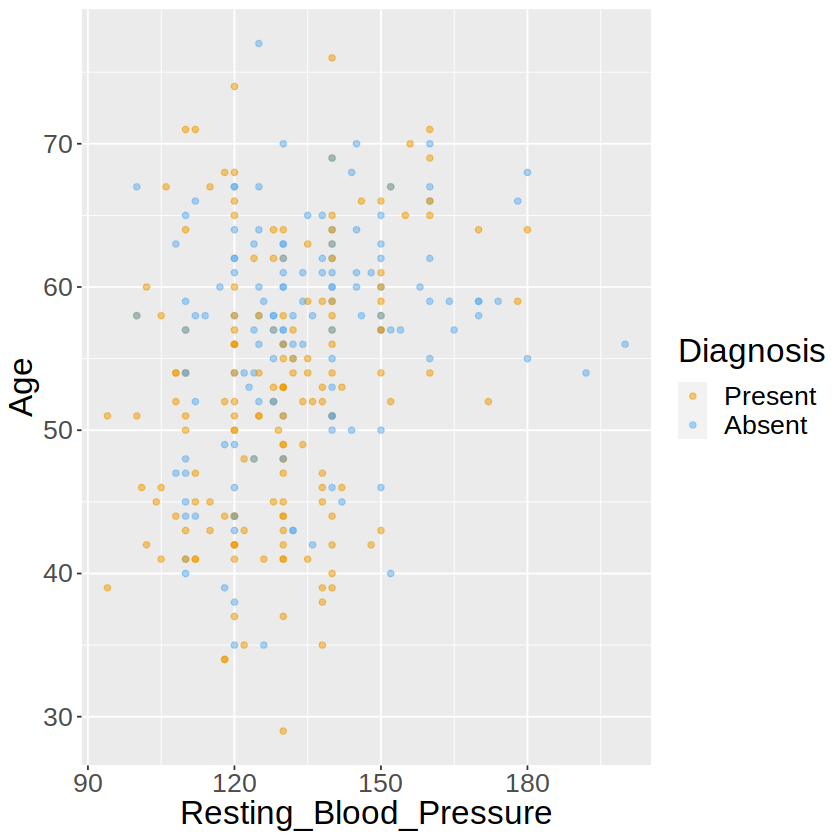

In [8]:
# To visualize the Age and Resting_Blood_Pressure vs. Diagnosis (Present = TRUE, Absent = FALSE)
perim_heart2 <- cleveland_heart_cleaned |>
  ggplot(aes(x = Resting_Blood_Pressure, y = Age, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

perim_heart2

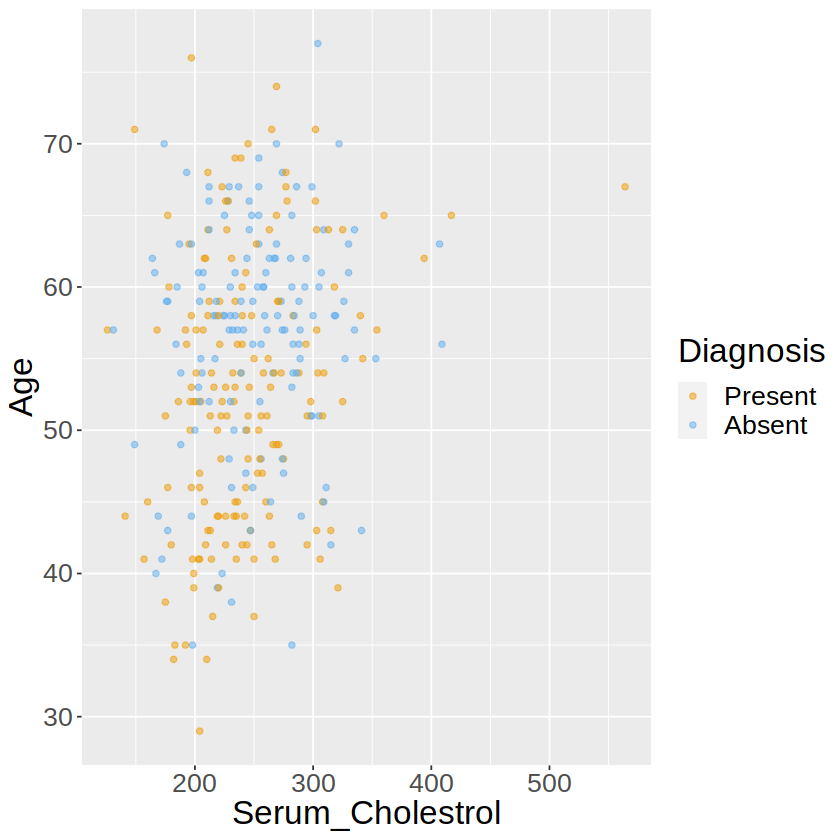

In [9]:
# This scatter plot aims to demonstrate the relationship between Age + Serum_Cholestro and the Diagnosis result (Present = TRUE, Absent = FALSE)
perim_heart3 <- cleveland_heart_cleaned |>
  ggplot(aes(x = Serum_Cholestrol, y = Age, color = Diagnosis)) +
  geom_point(alpha = 0.5) +
  labs(color = "Diagnosis") +
  scale_color_manual(labels = c("Present", "Absent"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 20))

perim_heart3

In [10]:
#Let's see the proportions in our data set
sample_proportions <- cleveland_heart_cleaned |>
                      group_by(Diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(cleveland_heart_cleaned))

sample_proportions


Diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,163,53.97351
TRUE,139,46.02649


In [11]:
#The mean of each group was taken just to get a sense of any visible trends
cleveland_heart_mean <- cleveland_heart_cleaned |>
    group_by(Age) |>
    summarize(Resting_Blood_Pressure = mean(Resting_Blood_Pressure),
             Serum_Cholestrol = mean(Serum_Cholestrol))
head(cleveland_heart_mean)

Age,Resting_Blood_Pressure,Serum_Cholestrol
<dbl>,<dbl>,<dbl>
29,130.0,204.00
34,118.0,196.00
35,126.5,213.75
37,125.0,232.50
38,129.0,203.00
39,122.5,239.75


In [12]:
#  Now, split the data set to training set and testing set randomly.
set.seed(2023)

heart_split <- initial_split(cleveland_heart_cleaned, prop = 0.75, strata = Diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

glimpse(heart_train)
glimpse(heart_test)


Rows: 226
Columns: 4
$ Age                    <dbl> 57, 57, 44, 57, 54, 49, 50, 66, 43, 59, 44, 40,…
$ Resting_Blood_Pressure <dbl> 120, 140, 120, 150, 140, 130, 120, 150, 150, 13…
$ Serum_Cholestrol       <dbl> 354, 192, 263, 168, 239, 266, 219, 226, 247, 23…
$ Diagnosis              <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE…
Rows: 76
Columns: 4
$ Age                    <dbl> 67, 37, 41, 56, 56, 52, 48, 64, 58, 58, 58, 69,…
$ Resting_Blood_Pressure <dbl> 160, 130, 130, 120, 140, 172, 130, 110, 150, 13…
$ Serum_Cholestrol       <dbl> 286, 250, 204, 236, 294, 199, 275, 211, 283, 22…
$ Diagnosis              <fct> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…


In [13]:
# To ensure if the training set have the same proportion in each classses(FALSE and TRUE) as they present in the sample sdata set.
training_set_proportions <- heart_train |>
                      group_by(Diagnosis) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_train))

training_set_proportions

Diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,122,53.9823
TRUE,104,46.0177


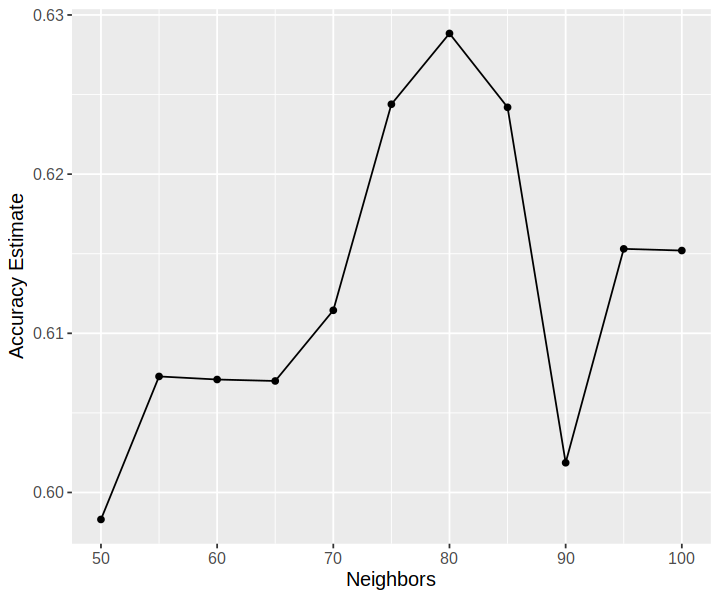

In [33]:
# This procedure includes cross-validation which intends to find the optimal k value with the highest accuracy for our model.
# because from the scatter plot, it seems like there might be a weak relationship between the predictors and the results,
# we may need a large numbers of "neighbors" to build our model here: testing k starts from 50
k_vals <- tibble(neighbors = seq(from = 50, to = 100, by = 5))
options(repr.plot.height = 5, repr.plot.width = 6)

knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                            neighbors = tune()) |>
                            set_engine("kknn") |>
                            set_mode("classification")

diagnosis_recipe <- recipe(Diagnosis ~ ., data = heart_train) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diagnosis_vfold <- vfold_cv(heart_train, v = 5, strata = Diagnosis)

diagnosis_analysis <- workflow() |>
                    add_recipe(diagnosis_recipe) |>
                    add_model(knn_tune) |>
                    tune_grid(resamples = diagnosis_vfold, grid = k_vals)

accuracies <- diagnosis_analysis |>
                collect_metrics() |>
                filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", y = "Accuracy Estimate") + 
                    theme(text = element_text(size = 12))

cross_val_plot

In [39]:
# use the training set to build the model and then use the model to test the testing set
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 90) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(diagnosis_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_train)

diagnosis_test_predictions <- predict(knn_fit, heart_test) |>
  bind_cols(heart_test)

head(diagnosis_test_predictions)

.pred_class,Age,Resting_Blood_Pressure,Serum_Cholestrol,Diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<fct>
TRUE,67,160,286,TRUE
FALSE,37,130,250,FALSE
FALSE,41,130,204,FALSE
TRUE,56,120,236,FALSE
TRUE,56,140,294,FALSE
FALSE,52,172,199,FALSE


In [40]:
# the prediction accuracy of the model
diagnosis_test_predictions |>
  metrics(truth = Diagnosis, estimate = .pred_class) |>
  filter(.metric == "accuracy")

confusion <- diagnosis_test_predictions |>
             conf_mat(truth = Diagnosis, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6052632


          Truth
Prediction FALSE TRUE
     FALSE    25   14
     TRUE     16   21

### Methods:
We will use Age, Chest pain type, Resting blood pressure, and Serum cholesterol as variables and compare all of these factors against the heart disease diagnosis, in order to determine whether or not these may be contributing factors. One way to visualize this would be to make a histogram of each category against the heart disease diagnosis, to see if increasings blood pressure, for example, has a correlation on the diagnosis.

1. Split the dataset into testing and training data
2. Determine which k to use; test different k values - plot the k vs. accuracy
3. With the best value of k (nearest neighbour, recipe), make a model with the training set
4. Make a prediction based on the model
5. Test it using the testing data
6. Compare our results with the results from the testing dataset
7. Create a multivariable linear regression line to see if we are able to predict the diagnosis based on the variables

## Expected outcomes and significance:
#### What do you expect to find?
- We expect to see a positive correlation in age, resting blood pressure, and serum cholesterol levels with the risk of heart disease. In other words, each variable will have its own positive correlation with the risk of heart disease.
#### What impact could such findings have?
- If there is a significant spike in the presence of heart disease after a certain age for example, then it would be recommended for people near that age to closely monitor their heart health and receive regular checkups.
#### What future questions could this lead to?
- If a significant correlation appears between a variable and the presence of heart disease, then the next step would be further research to examine the underlying biological cause of this observed trend.

### References:
- National Center for Chronic Disease Prevention and Health Promotion, Division for Heart Disease and Stroke Prevention. (2023, Feb. 24). Heart Disease. cdc.gov. https://www.cdc.gov/heartdisease/index.htm#:~:text=The%20term%20%E2%80%9Cheart%20disease%E2%80%9D%20refers,%2C%20in%20some%20cases%2C%20medicine
- World Health Organization. (2021, June 11). Cardiovascular diseases (CVDs). World Health Organization. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)